# 壓縮data : PCA 
# 分類 : SVC, K-means, Mean shift

## 目錄
* PCA
* SVC
* K-means 自動分類
* 'make_blobs' 生更像真實世界的數據
* Mean Shifts 完全自動分類
* 'cross_val_score' : 比較各個方法 : 相同假設下比較mean就可以看出來誰較好

# 1 PCA

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### step 1 讀入鳶尾花數據集

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

### step 2 打開PCA機壓縮data

In [5]:
from sklearn.decomposition import PCA

* n_components=2 : 因為我們要壓到2維

In [6]:
pca = PCA(n_components=2)

### step 3 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### step 4 預測

#### 確認是否已壓縮到2維

In [8]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [9]:
X = pca.transform(x)

In [10]:
X[87]

array([ 0.81509524, -0.37203706])

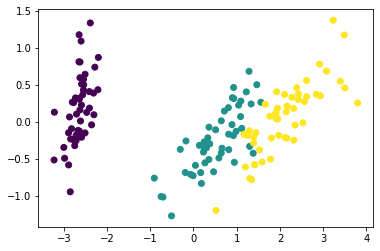

In [11]:
plt.scatter(X[:,0], X[:,1], c = y)

### step 5 準備訓練/測試資料

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### step 6 數據分析

## 2 SVC

#### step 1 : 開SVC函數學習機 
* 其實SVM也可以做迴歸(用SVR)，它不只可以輸出分類，還可以輸出比如:3.5, 2.5.....，只是我們通常用SVM於分類而已

In [14]:
from sklearn.svm import SVC

In [15]:
clf = SVC(gamma = 'auto')

#### step 2 : 訓練

In [16]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### step 3 : 預測

In [17]:
y_predict = clf.predict(x_test) 

In [18]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### step 4 : 隨便生成一組數字testing

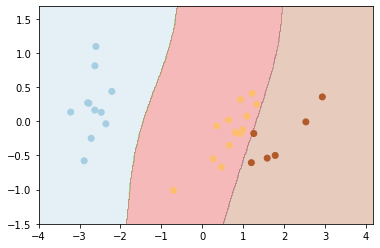

In [20]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym= np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha = 0.3, cmap = 'Paired')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, cmap = 'Paired')

## 3 K-means 自動分類

* 取100個[0, 1]間的數

In [23]:
x = np.random.rand(100, 2)

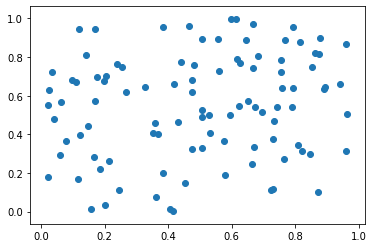

In [24]:
plt.scatter(x[:,0], x[:,1])

### step 1 打開 K - means 函數學習機

In [25]:
from sklearn.cluster import KMeans

* n_clusters = 3 : 表示有三個類別

In [26]:
clf = KMeans(n_clusters = 3)

### step 2 訓練

####  此處不用區分訓練與測試資料因為電腦自己分好了(非監督式學習)

In [27]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step 3 預測

In [28]:
clf.predict(x)

array([1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0,
       2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0,
       2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

### 正確答案

In [29]:
clf.labels_

array([1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0,
       2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0,
       2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

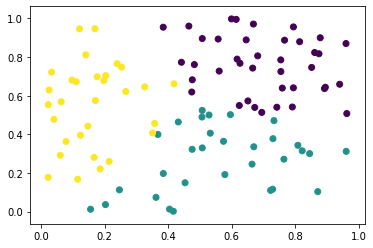

In [30]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

### step 4 隨便生成一組數字testing

####  此處一定分類的很好因為是它自己分的

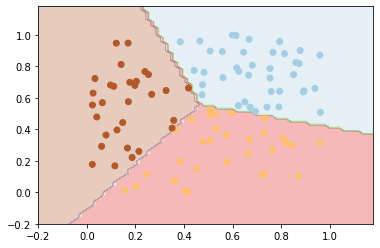

In [31]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha = 0.3, cmap='Paired')
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

## ????k means 還有甚麼應用

## 4 'make_blobs' 生更像真實世界的數據

In [33]:
from sklearn.datasets.samples_generator import make_blobs

* centers = 3 : 有三個中心點 (分類)

In [34]:
x, y = make_blobs(n_samples = 500, centers = 3, n_features = 2, random_state = 0)

In [67]:
#x #data
#y #類別

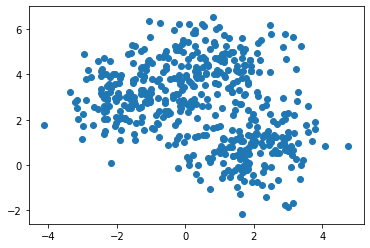

In [36]:
plt.scatter(x[:,0], x[:,1])

* 只用這些來給 K-means 分類

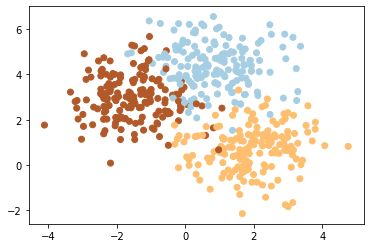

In [35]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired')

### step 1 打開 K-means 函數學習機

In [37]:
clf = KMeans(n_clusters = 3)

### step 2 訓練

In [38]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step 3 預測

#### 此處一定分類的很好因為是它自己分的

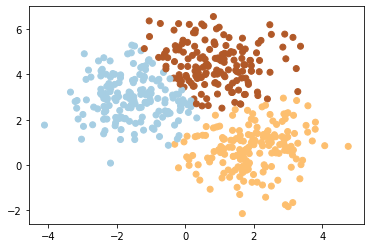

In [39]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_, cmap='Paired')

## 5 Mean Shifts 完全自動分類

### step 1 : 打開函數學習機

In [40]:
from sklearn.cluster import MeanShift

## ??

### Bandwidth 用於 RBF kernel，主要用於線性不可分的情形，將資料投射到更高維的空間，讓其變得可以線性分割，做聚集後就可得各類別的中心點，以及各點的label
#### ● bandwidth=0.2 : 可以控制分類要多要少

In [71]:
clf = MeanShift(bandwidth=0.9)

### step 2 : 訓練

In [72]:
clf.fit(x)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### step 3 : 預測

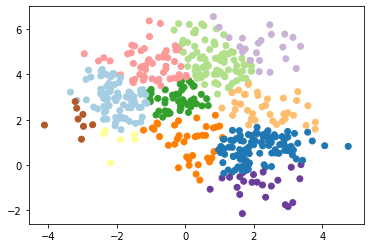

In [73]:
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap='Paired')

### step 4 隨便生成一組數字testing 

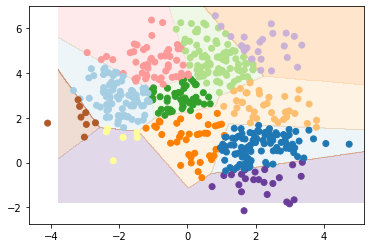

In [44]:
x0 = np.arange(-3.8, 5.2, 0.02)
y0 = np.arange(-1.8, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha = 0.2, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap='Paired')

## 6 比較各個方法 : 相同假設下比較mean就可以看出來誰較好

## 'cross_val_score'

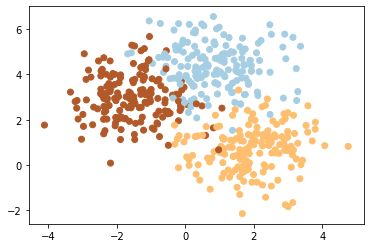

In [45]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap='Paired')

In [46]:
from sklearn.model_selection import cross_val_score

### (1) SVC

In [47]:
from sklearn.svm import SVC

In [48]:
clf = SVC(gamma = 'auto')

#### cv = 5 : 切 5次

In [49]:
scores = cross_val_score(clf, x, y, cv = 5)

#### 分類 5 次完畢

In [50]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [51]:
scores.mean()

0.9420106716554008

### (2) 決策樹

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf = DecisionTreeClassifier()

In [54]:
scores = cross_val_score(clf, x, y, cv = 5)

In [55]:
scores

array([0.92156863, 0.89108911, 0.94949495, 0.90909091, 0.88888889])

In [56]:
scores.mean()

0.9120264967673238

### (3) Random Forest
* 總體學習的一種方法

In [57]:
from sklearn.ensemble import RandomForestClassifier 

#### n_estimators=100 : 100顆樹

In [58]:
clf = RandomForestClassifier(n_estimators=100)

In [59]:
scores = cross_val_score(clf, x, y, cv = 5)

In [60]:
scores

array([0.91176471, 0.92079208, 0.96969697, 0.88888889, 0.88888889])

In [61]:
scores.mean()

0.9160063065130043